In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
google = yf.Ticker("GOOG")

In [ ]:
df = google.history(period='1d', interval="1m")
print(df.head())

                                 Open        High         Low       Close  \
Datetime                                                                    
2023-05-11 09:30:00-04:00  115.860001  116.320000  115.059998  115.548500   
2023-05-11 09:31:00-04:00  115.559998  115.970001  115.510002  115.800003   
2023-05-11 09:32:00-04:00  115.790001  115.809998  115.349998  115.739998   
2023-05-11 09:33:00-04:00  115.739998  115.955002  115.160004  115.180000   
2023-05-11 09:34:00-04:00  115.169998  115.620003  114.930099  115.609802   

                            Volume  Dividends  Stock Splits  
Datetime                                                     
2023-05-11 09:30:00-04:00  3565730        0.0           0.0  
2023-05-11 09:31:00-04:00   509163        0.0           0.0  
2023-05-11 09:32:00-04:00   480305        0.0           0.0  
2023-05-11 09:33:00-04:00   687273        0.0           0.0  
2023-05-11 09:34:00-04:00   694665        0.0           0.0  


In [ ]:
df = google.history(period='1d', interval="1m")
df = df[['Low']]
df.head()

,Low
Datetime,
2023-05-11 09:30:00-04:00,115.059998
2023-05-11 09:31:00-04:00,115.510002
2023-05-11 09:32:00-04:00,115.349998
2023-05-11 09:33:00-04:00,115.160004
2023-05-11 09:34:00-04:00,114.930099


In [ ]:
df['date'] = pd.to_datetime(df.index).time
df.set_index('date', inplace=True)
df.head()

,Low
date,
09:30:00,115.059998
09:31:00,115.510002
09:32:00,115.349998
09:33:00,115.160004
09:34:00,114.930099


In [ ]:
X = df.index.values
y = df['Low'].values
# The split point is the 10% of the dataframe length
offset = int(0.10*len(df))
X_train = X[:-offset]
y_train = y[:-offset]
X_test  = X[-offset:]
y_test  = y[-offset:]

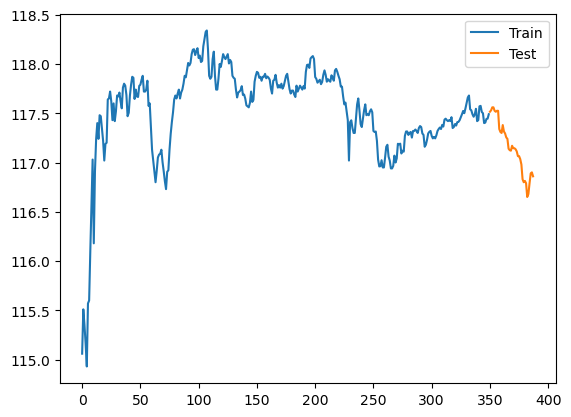

In [ ]:
plt.plot(range(0,len(y_train)),y_train, label='Train')
plt.plot(range(len(y_train),len(y)),y_test,label='Test')
plt.legend()
plt.show()

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression

X, y = load_data()
model = LogisticRegression()

with warnings.catch_warnings():
    warnings.filterwarnings("error", category=ConvergenceWarning)
    try:
        model.fit(X, y)
    except ConvergenceWarning:
        print("ConvergenceWarning: Maximum number of iterations exceeded")

score = model.score(X, y)
print("Model score:", score)

In [ ]:
print(f'Real data for time 0: {y_train[len(y_train)-1]}')
print(f'Real data for time 1: {y_test[0]}')
print(f'Pred data for time 1: {forecast}')

Real data for time 0: 117.48999786376953
Real data for time 1: 117.51499938964844
Pred data for time 1: 117.49398122861169
